## Prova prática de Visão Computacional

2. Seja o conjunto de imagens satelitais associadas às regiões urbanas (pasta Questão 2)

    a. A imagem RGB airport.png apresenta uma pista de aeroporto, conforme indicado abaixo. Implemente um código responsável pela seleção dos conjuntos de pixels associados ao objeto silo.

    b.Considerando um conjunto de imagens satelitais provenientes do sensor WorldView-2 (resolução de 0.5m e 8 bandas espectrais, em arquivos .tif), implemente algum método para segmentação da vegetação presente nas cenas.

In [1]:
!unzip -j 'Questão 2-20240328T203801Z-001.zip'

Archive:  Questão 2-20240328T203801Z-001.zip
  inflating: 8band_AOI_1_RIO_img47.tif  
  inflating: 8band_AOI_1_RIO_img66.tif  
  inflating: airport.PNG             
  inflating: 8band_AOI_1_RIO_img67.tif  
  inflating: 8band_AOI_1_RIO_img46.tif  


In [2]:
!ls

 8band_AOI_1_RIO_img46.tif   airport.PNG
 8band_AOI_1_RIO_img47.tif  'Questão 2-20240328T203801Z-001.zip'
 8band_AOI_1_RIO_img66.tif   Resolucao2.ipynb
 8band_AOI_1_RIO_img67.tif


#### Vizualizar imagens PNG e TIF

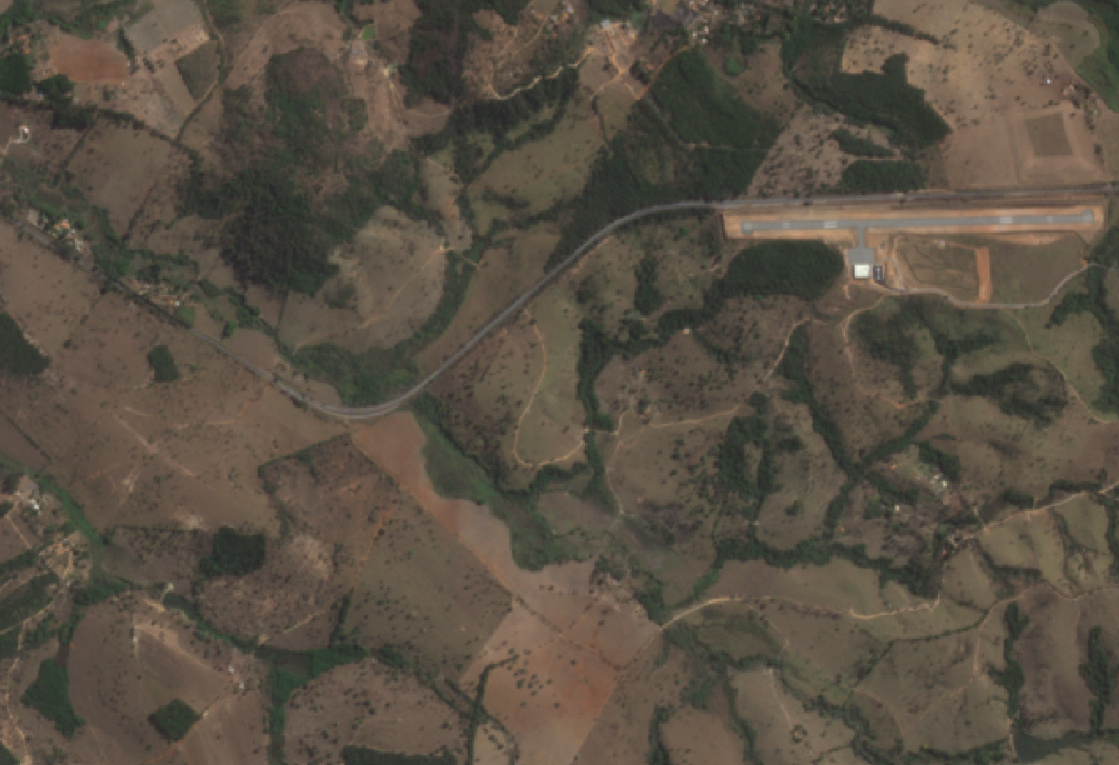

In [1]:
from IPython.display import Image
Image(filename='airport.PNG') 

In [2]:
Image(filename='8band_AOI_1_RIO_img46.tif') 

ValueError: Cannot embed the 'tif' image format

In [5]:
from PIL import Image

img46 = Image.open("8band_AOI_1_RIO_img46.tif")
img46.show()

More samples per pixel than can be decoded: 8


UnidentifiedImageError: cannot identify image file '8band_AOI_1_RIO_img46.tif'

In [6]:
import cv2
img = cv2.imread("8band_AOI_1_RIO_img46.tif", -1)

imread_('8band_AOI_1_RIO_img46.tif'): can't read header: OpenCV(4.6.0) /croot/opencv-suite_1691620365762/work/modules/imgcodecs/src/grfmt_tiff.cpp:152: error: (-2:Unspecified error) in function 'int cv::TiffDecoder::normalizeChannelsNumber(int) const'
> Unsupported number of channels:
>     'channels >= 1 && channels <= 4'
> where
>     'channels' is 8



#### Não foi possível instanciar as imagens TIFF com as bibliotecas Pillow e OpenCV. Isso ocorre porque a imagem possui 8 canais, enquanto tradicionalmente são apenas 3 canais (RGB). Portanto, precisamos encontrar uma biblioteca capaz de lidar com essas imagens provenientes do WorldView-2.

In [8]:
!conda install tifffile --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /home/ymarca/anaconda3/envs/fiesc-prova

  added / updated specs:
    - tifffile


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imagecodecs-2023.1.23      |   py38hc4b7b5f_0         9.5 MB
    snappy-1.1.10              |       h6a678d5_1          43 KB
    tifffile-2023.4.12         |   py38h06a4308_0         385 KB
    ------------------------------------------------------------
                                           Total:         9.9 MB

The following NEW packages will be INSTALLED:

  aom                pkgs/main/linux-64::a

#### Restart kernel

In [1]:
import numpy as np
import tifffile

img46 = tifffile.imread("8band_AOI_1_RIO_img46.tif")

np.array(img46).shape

(101, 110, 8)

#### Através da biblioteca tifffile, foi possível abrir a figura TIFF. Podemos notar que a figura tem resolução de 101x110 e 8 canais. Vamos vizualizar os 8 canais!

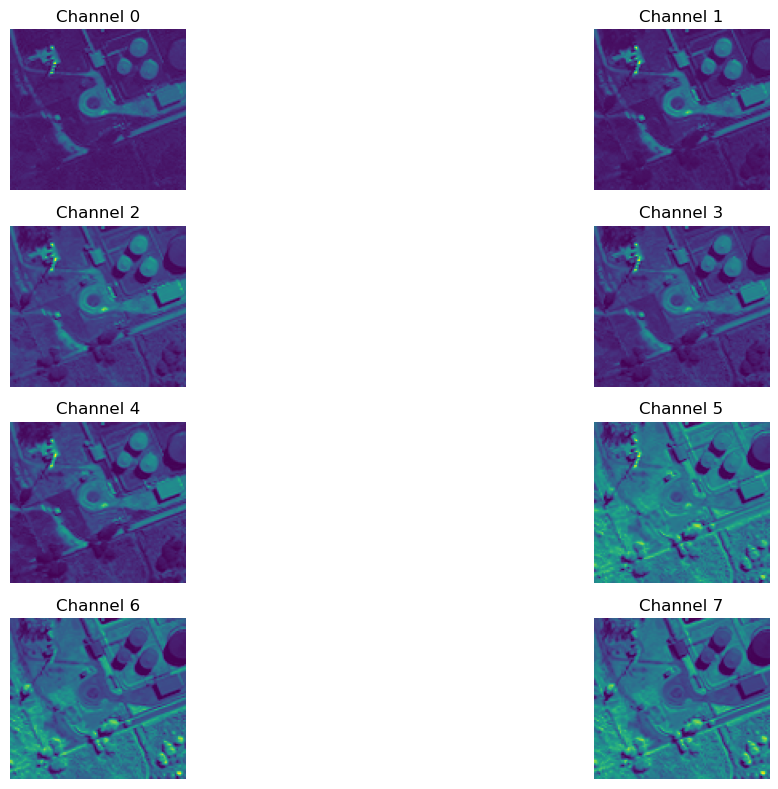

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(16, 8))

channel = 0
for ax_row in axes:
    for ax in ax_row:
        ax.axis('off')

        ax.imshow(img46[:, :, channel])
        ax.set_title(f"Channel {channel}")
        channel += 1

plt.tight_layout()
plt.show()

#### Através da biblioteca específica para este tipo de arquivo, é possível visualizar cada um dos 8 canais disponíveis nas imagens de satélite do WorldView-2 que foram disponibilizadas.

## WorldView-2

De acordo com o paper "Vegetation classification of Coffea on Hawaii Island using WorldView-2 satellite imagery" disponivel na pasta Referencias, os 8 canais correspondem aos seguintes espectros:

| Description Band | ID | Spectral resolution(nm) |
|------------------|----|-------------------------|
| Coastal blue     | 0  | 400 to 450              |
| Blue             | 1  | 450 to 510              |
| Green            | 2  | 510 to 580              |
| Yellow           | 3  | 585 to 625              |
| Red              | 4  | 630 to 690              |
| Red-edge         | 5  | 705 to 745              |
| NIR              | 6  | 770 to 895              |
| NIR2             | 7  | 860 to 1040             |

Desta forma, para obtermos uma imagem tradicional RGB, devemos pegar as bandas 4,2,1, respectivamente.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


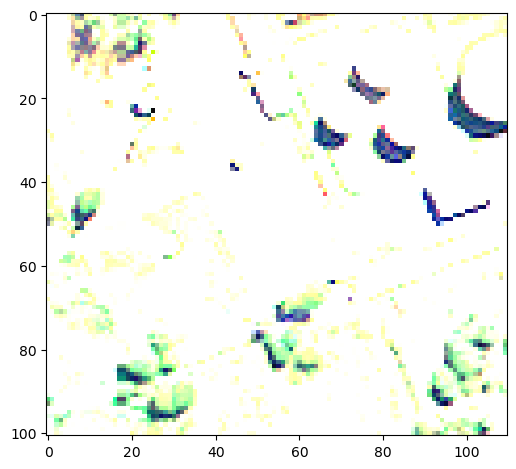

In [3]:
rgb_image = np.dstack((img46[:, :, 4], img46[:, :, 2], img46[:, :, 1]))
plt.imshow(rgb_image)
plt.tight_layout()
plt.show()

#### De acordo com o erro apresentado acima, a matriz de informações dos pixels não está no intervalo padrão [0,1] ou [0,255]. Vamos verificar!

In [4]:
print(f"Valor maximo para um pixel = {np.max(img46)}")

Valor maximo para um pixel = 8067


#### Como foi verificado, os valores ultrapassam 255 e a função do matplotlib está truncando os valores em 255, resultando em uma imagem muito clara. Vamos normalizar a matriz e plotar novamente!

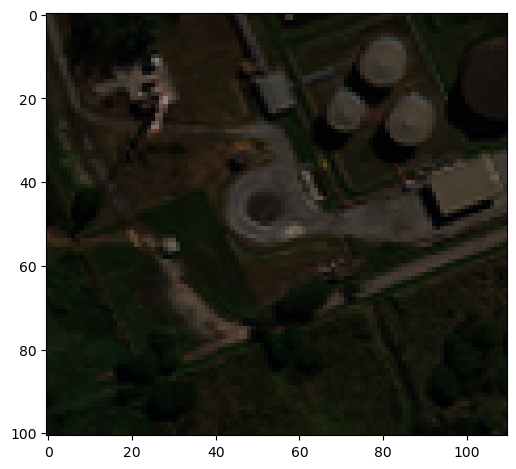

In [5]:
rgb_image = np.dstack((img46[:, :, 4].astype(np.float32) / np.max(img46), 
                      img46[:, :, 2].astype(np.float32) / np.max(img46), 
                      img46[:, :, 1].astype(np.float32) / np.max(img46)))
plt.imshow(rgb_image)
plt.tight_layout()
plt.show()

#### A imagem aparenta estar muito escura. Nosso processo de normalização não está perfeito, ou então estamos deixando informações de outras bandas de fora, como o caso da amarela. Vamos apenas multiplicar a matriz por um fator de clareamento, já que esta etapa serve apenas para visualização das imagens.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


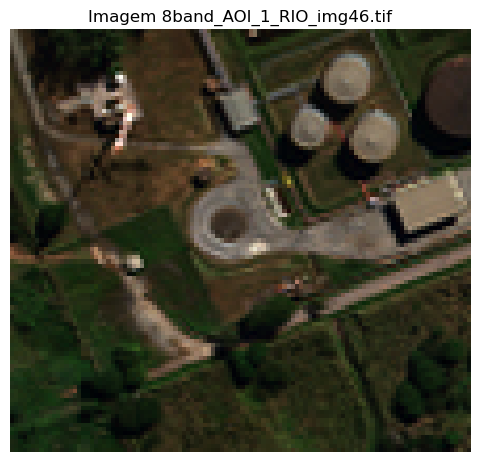

In [7]:
rgb_image = np.dstack((img46[:, :, 4].astype(np.float32) / np.max(img46), 
                      img46[:, :, 2].astype(np.float32) / np.max(img46), 
                      img46[:, :, 1].astype(np.float32) / np.max(img46)))
plt.imshow(rgb_image*2)
plt.tight_layout()
plt.axis("off")
plt.title("Imagem 8band_AOI_1_RIO_img46.tif")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


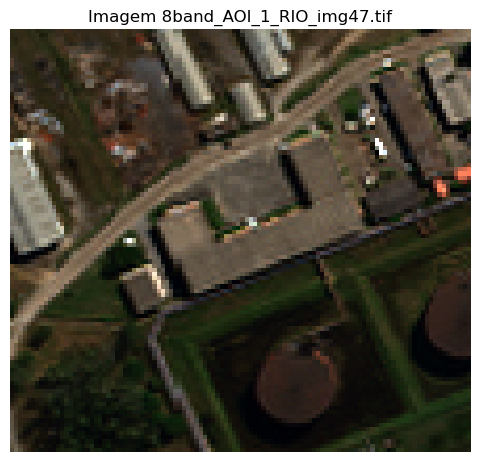

In [8]:
img47 = tifffile.imread("8band_AOI_1_RIO_img47.tif")

rgb_image2 = np.dstack((img47[:, :, 4].astype(np.float32) / np.max(img47), 
                      img47[:, :, 2].astype(np.float32) / np.max(img47), 
                      img47[:, :, 1].astype(np.float32) / np.max(img47)))
plt.imshow(rgb_image2*2)
plt.tight_layout()
plt.axis("off")
plt.title("Imagem 8band_AOI_1_RIO_img47.tif")
plt.show()

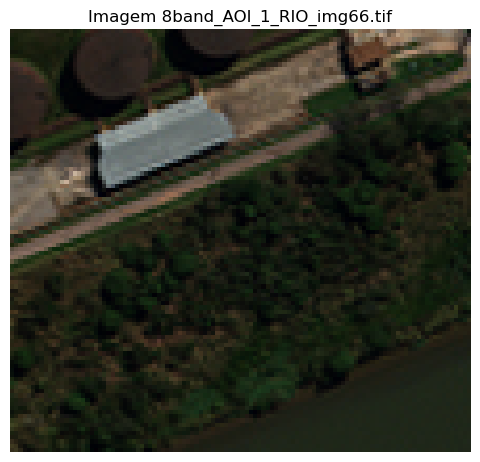

In [9]:
img66 = tifffile.imread("8band_AOI_1_RIO_img66.tif")

rgb_image3 = np.dstack((img66[:, :, 4].astype(np.float32) / np.max(img66), 
                      img66[:, :, 2].astype(np.float32) / np.max(img66), 
                      img66[:, :, 1].astype(np.float32) / np.max(img66)))
plt.imshow(rgb_image3*2)
plt.tight_layout()
plt.axis("off")
plt.title("Imagem 8band_AOI_1_RIO_img66.tif")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


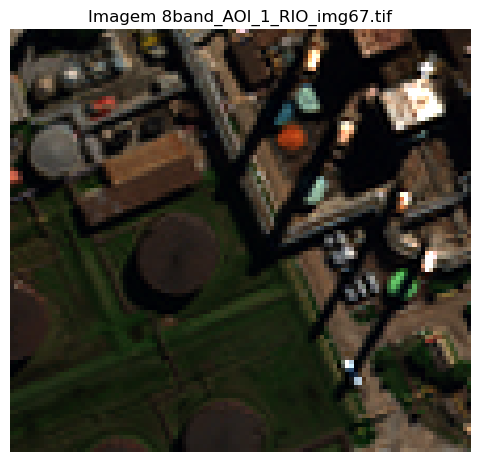

In [10]:
img67 = tifffile.imread("8band_AOI_1_RIO_img67.tif")

rgb_image4 = np.dstack((img67[:, :, 4].astype(np.float32) / np.max(img67), 
                      img67[:, :, 2].astype(np.float32) / np.max(img67), 
                      img67[:, :, 1].astype(np.float32) / np.max(img67)))
plt.imshow(rgb_image4*2)
plt.tight_layout()
plt.axis("off")
plt.title("Imagem 8band_AOI_1_RIO_img67.tif")
plt.show()

# Resolução (a)
A imagem RGB airport.png apresenta uma pista de aeroporto. Implemente um código responsável pela seleção dos conjuntos de pixels associados ao objeto **pista de pouso** ~~silo~~.

**OBS: O enumciado me parece estar errado, irei identificar a pista de pouso da imagem.**

- Irei utilizar OpenCV para identificar contornos na imagem e selecionar o contorno de maior area como pista de pouso.


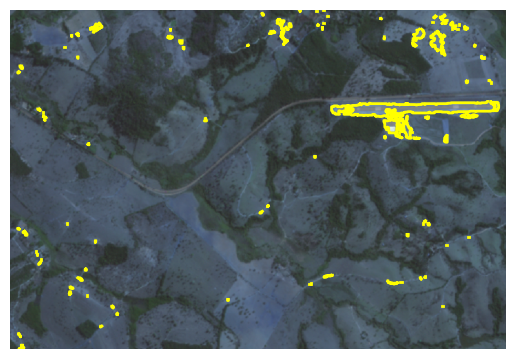

In [11]:
import cv2

image = cv2.imread('airport.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]  

contours, aux = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(image)

for c in contours:
    plt.plot(c[:, 0, 0], c[:, 0, 1], color='yellow', linewidth=2)

plt.axis('off')
plt.show()

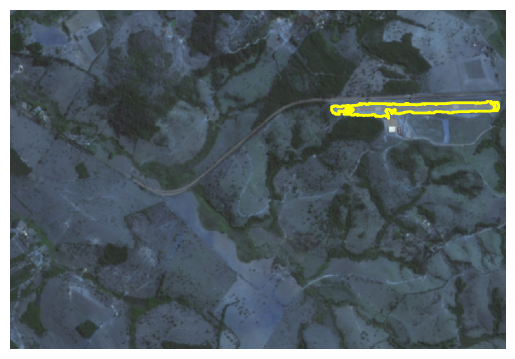

In [12]:
largest_area = 0
largest_c = None

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if area > largest_area:
        largest_area = area
        largest_c = c

plt.imshow(image)

plt.plot(largest_c[:, 0, 0], largest_c[:, 0, 1], color='yellow', linewidth=2)

plt.axis('off')
plt.show()

#### Este modo de resolver a questão foi extremamente simples. Só foi possível encontrar a solução porque não há outros contornos que se destacam na imagem. Para fotos de pistas de pouso em uma cidade, este método não iria funcionar!

# Resolução (b)
Considerando um conjunto de imagens satelitais provenientes do sensor WorldView-2 (resolução de 0.5m e 8 bandas espectrais, em arquivos .tif), implemente algum método para segmentação da vegetação presente nas cenas.

- De acordo com o paper "High density biomass estimation for wetland vegetation using WorldView-2 imagery and random forest regression algorithm" disponível na pasta Referencias, o indice NDVI (Normalized Difference Vegetation Index) é muito utilizado para identificar vegetação em imagens do WorldView-2.
- Para calcularmos o NDVI = (NIR - Red) / (NIR + Red). Contudo, o paper testa a combinação de todos os canais para calcular o NDVI:
"The NDVI-based vegetation indices were computed in this study from all possible two band combinations of WorldVeiw-2 bands (n = 8)." pag 401.

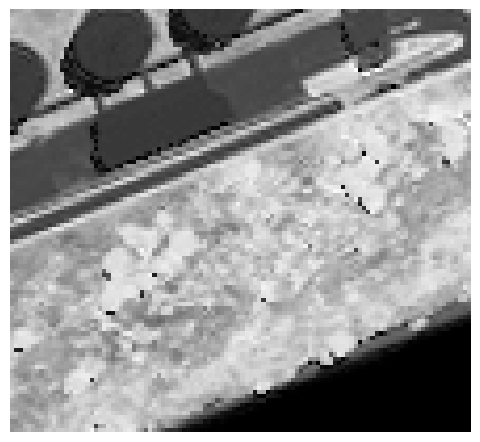

In [13]:
# Vamos testar o primeiro caso: NDVI = (NIR - Red) / (NIR + Red)
# NIR = canal 6, Red = canal 4
NIR = img66[:,:,6].astype(np.float32) / np.max(img66[:,:,6])
Red = img66[:,:,4].astype(np.float32) / np.max(img66[:,:,4])
NDVI = (NIR - Red) / (NIR + Red)

plt.imshow(NDVI, cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.show()

#### As áreas mais brancas devem corresponder às áreas de vegetação, então o método de utilizar o NDVI parece funcionar.
#### O índice NDVI varia entre -1 e 1, onde 1 corresponde à vegetação. Vamos verificar!

In [14]:
np.max(NDVI)

0.971128

In [15]:
np.min(NDVI)

-0.99017507

#### De fato, varia entre -1 e 1. Podemos então definir um limite para classificar como área de vegetação.

https://eos.com/pt/make-an-analysis/ndvi/

#### Segundo o website acima, um threshold acima de 0,3 deve corresponder a áreas de vegetação.

In [16]:
NDVI > 0.3

array([[False, False,  True, ..., False, False,  True],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

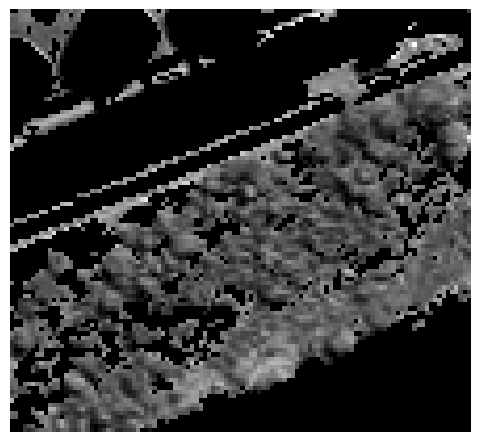

In [17]:
gray_image = cv2.cvtColor((rgb_image3*2*255).astype(np.uint8), cv2.COLOR_BGR2GRAY)

plt.imshow(np.array(np.where((NDVI > 0.3), gray_image, 0)), cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.show()